[ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3  5.8
  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2  5.2  4.7
  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5  4.4  5.   5.1
  4.8  5.1  4.6  5.3  5.   7.   6.4  6.9  5.5  6.5  5.7  6.3  4.9  6.6  5.2
  5.   5.9  6.   6.1  5.6  6.7  5.6  5.8  6.2  5.6  5.9  6.1  6.3  6.1  6.4
  6.6  6.8  6.7  6.   5.7  5.5  5.5  5.8  6.   5.4  6.   6.7  6.3  5.6  5.5
  5.5  6.1  5.8  5.   5.6  5.7  5.7  6.2  5.1  5.7  6.3  5.8  7.1  6.3  6.5
  7.6  4.9  7.3  6.7  7.2  6.5  6.4  6.8  5.7  5.8  6.4  6.5  7.7  7.7  6.
  6.9  5.6  7.7  6.3  6.7  7.2  6.2  6.1  6.4  7.2  7.4  7.9  6.4  6.3  6.1
  7.7  6.3  6.4  6.   6.9  6.7  6.9  5.8  6.8  6.7  6.7  6.3  6.5  6.2  5.9]


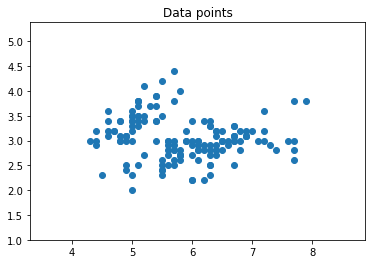

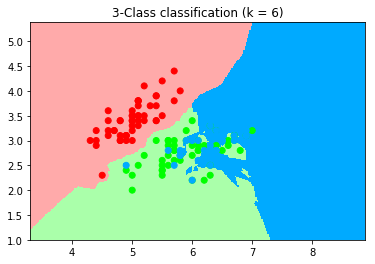

In [2]:
import matplotlib
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
 
n_neighbors = 6
 
# import some data to play with
iris = datasets.load_iris()
 
# prepare data
X = iris.data[:, :2]  # use 2 features
y = iris.target
h = .02 
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # first feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # second feature
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Put the result into a color plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()
 
# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()


# Predict some data
#sl = raw_input('Enter sepal length (cm): ')
#sw = raw_input('Enter sepal width (cm): ')
#dataClass = clf.predict([[sl,sw]])
#
#print('Prediction: '),
# 
#if dataClass == 0:
#    print('Iris Setosa')
#elif dataClass == 1:
#    print('Iris Versicolour')
#else:
#    print('Iris Virginica')



